In [4]:
pip install opencv_python

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: opencv_python in c:\users\sagar\appdata\local\programs\python\python39\lib\site-packages (4.11.0.86)



You should consider upgrading via the 'c:\Users\sagar\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import zipfile
import warnings
import os
warnings.simplefilter('ignore')

In [61]:
dataset_path = r'C:\Users\sagar\Desktop\plastic_classification\dataset\Dataset'

In [62]:
train_path = dataset_path 
test_path = dataset_path

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [64]:
x_data = []
y_data = []
for category in glob(train_path + '/*'):  # Iterate over subfolders (biodegradable, recyclable, trash)
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        
        # Check if the image was loaded correctly
        if img_array is not None:
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            x_data.append(img_array)
            y_data.append(category.split('/')[-1])  # Extract folder name as the label (biodegradable, recyclable, trash)
        else:
            print(f"Warning: Could not load image {file}") 

  0%|          | 0/131 [00:00<?, ?it/s]

 67%|██████▋   | 88/131 [00:00<00:00, 158.08it/s]

100%|██████████| 130/130 [00:01<00:00, 81.86it/s]


In [65]:
data = pd.DataFrame({'image': x_data, 'label': y_data})

In [66]:
print("First few rows of the data:")
print(data.head())  # Check the first few rows of the data DataFrame

print("Count of each label in the dataset:")
print(data['label'].value_counts())  # Check the count of images in each category


First few rows of the data:
                                               image  \
0  [[[97, 60, 41], [76, 39, 20], [67, 32, 12], [7...   
1  [[[5, 6, 8], [5, 6, 8], [5, 6, 8], [5, 6, 8], ...   
2  [[[20, 102, 160], [22, 104, 162], [24, 106, 16...   
3  [[[87, 48, 17], [81, 42, 11], [77, 38, 5], [82...   
4  [[[173, 114, 46], [166, 107, 39], [157, 94, 25...   

                                               label  
0  C:\Users\sagar\Desktop\plastic_classification\...  
1  C:\Users\sagar\Desktop\plastic_classification\...  
2  C:\Users\sagar\Desktop\plastic_classification\...  
3  C:\Users\sagar\Desktop\plastic_classification\...  
4  C:\Users\sagar\Desktop\plastic_classification\...  
Count of each label in the dataset:
label
C:\Users\sagar\Desktop\plastic_classification\dataset\Dataset\Biodegradable Images    130
C:\Users\sagar\Desktop\plastic_classification\dataset\Dataset\Recyclable Images       130
C:\Users\sagar\Desktop\plastic_classification\dataset\Dataset\Trash Images         

In [67]:
data_counts = data['label'].value_counts()
data_dict = data_counts.to_dict()

print("Data for Pie Chart:", data_dict)

Data for Pie Chart: {'C:\\Users\\sagar\\Desktop\\plastic_classification\\dataset\\Dataset\\Biodegradable Images': 130, 'C:\\Users\\sagar\\Desktop\\plastic_classification\\dataset\\Dataset\\Recyclable Images': 130, 'C:\\Users\\sagar\\Desktop\\plastic_classification\\dataset\\Dataset\\Trash Images': 130}


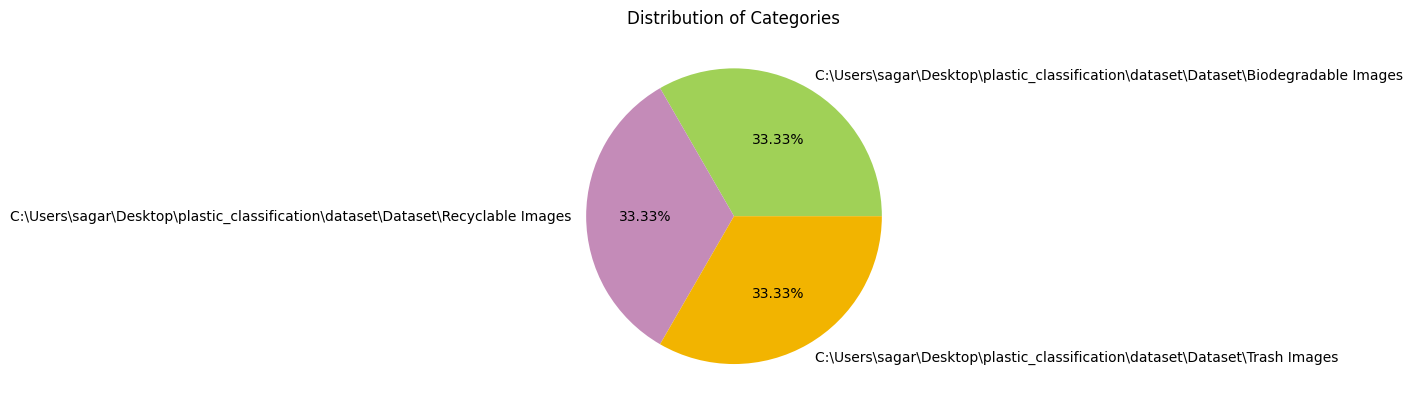

In [68]:
if data_dict:  # Only plot if there is valid data
    colors = ['#a0d157', '#c48bb8', '#f2b400']  # Customize colors as needed
    plt.pie(data_dict.values(), labels=data_dict.keys(), colors=colors, autopct='%0.2f%%')
    plt.title("Distribution of Categories")
    plt.show()
else:
    print("No valid data to plot the pie chart.")

In [72]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(3))  # Updated from 2 to 3 units to accommodate three categories
model.add(Activation('softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size = 32  # Adjust batch size for better memory management

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           195 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,315 (84.92 MB)

 Trainable params: 22,261,315 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size=(224, 224),
    batch_size=batch_size, 
    color_mode="rgb", 
    class_mode="categorical"  # For multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"  # For multi-class classification
)

Found 390 images belonging to 3 classes.
Found 390 images belonging to 3 classes.


In [74]:
hist = model.fit(
    train_generator, 
    epochs=10, 
    validation_data=test_generator
)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.4185 - loss: 2.5592 - val_accuracy: 0.4897 - val_loss: 0.9907
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.5163 - loss: 0.9491 - val_accuracy: 0.6949 - val_loss: 0.7376
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.5637 - loss: 0.8470 - val_accuracy: 0.7333 - val_loss: 0.6597
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.6316 - loss: 0.7489 - val_accuracy: 0.6821 - val_loss: 0.6937
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.6353 - loss: 0.7017 - val_accuracy: 0.6769 - val_loss: 0.5908
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.6998 - loss: 0.5978 - val_accuracy: 0.6744 - val_loss: 0.5771
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.6726 - loss: 0.6565 - val_accuracy: 0.7128 - val_loss: 0.5870
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.6952 - loss: 0.5890 - val_accuracy: 0.7744 - val_loss: